   # Capstone Project - The Battle of Neighborhoods

## 1. Introduction

Seoul is one of the biggest cities in the world. Opening a restaurant in Seoul would be very challenging as there are many competitors. For this reason, finding a good location to open a Korean restaurant would be helpful to those who want to open the restaurant. If there are too many competitors in a region, opening in that specific region would be very challenging. If there are no competitors at all, it may seem to be an opportunity, but in another perspective, this could mean there is no demand. So, a good analysis is needed to open a restaurant and operate well. There is a total of 25 districts in Seoul. Where would be the best location to open a Korean restaurant?

## 2. Data Source

To get the neighborhood data, the list of Seoul districts and information of their population was used through Wikipedia. To analyze this data, Python geocoder was also be used to obtain geographical coordinates. Also, folium library was also used in order to load maps and coordinate using latitudes and longitudes information. Finally, Foursquare API was also used in order to get ranks and likes of restaurants.

## 3. Methods / Results

In [1]:
#install libraries 
!pip install geopy    
!pip install folium   
!pip install geocoder

In [2]:
#import libraries 
import numpy as np # library to handle data in a vectorized manner

# library for data analsysis
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# for graphical purpose 
import matplotlib.pyplot as plt 
import json 

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

# for geographical coordinates
import geocoder 

# library to handle requests
import requests 
from pandas.io.json import json_normalize 

# plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium 
from folium import plugins
from folium.plugins import HeatMap

from bs4 import BeautifulSoup 
import pandas as pd
import requests



First, when using the geocoder, the geographical coordinate of Seoul, Korea was (37.5, 126.9) and the number of Seoul districts was 25. 

In [3]:
# get coordinates of Seoul
Seoul_address = 'Seoul, Korea'

geolocator = Nominatim(user_agent="Seoul_explorer")
location = geolocator.geocode(Seoul_address)
latitude = location.latitude
longitude = location.longitude
Seoul_center = [latitude, longitude ]

print('The geograpical coordinate of {} :  {}, {}.'.format(Seoul_address, latitude, longitude))

The geograpical coordinate of Seoul, Korea :  37.5666791, 126.9782914.


In [4]:
# Read Seoul neighborhood data 
url = "https://en.wikipedia.org/wiki/Category:Geography_of_Seoul_by_district"
source = requests.get(url).text
soup = BeautifulSoup(source,'lxml')

neighborhoodList = []


# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text.replace(', Seoul',''))
    
df_neighborhood = pd.DataFrame({"Neighborhood": neighborhoodList})
print("The number of {} districts: {}".format(Seoul_address, df_neighborhood.shape[0]))

The number of Seoul, Korea districts: 25


The population of each district was found (see table below).

In [5]:
# Read Seoul district data from wikipedia
url = "https://en.wikipedia.org/wiki/List_of_districts_of_Seoul"
source = requests.get(url).text
soup = BeautifulSoup(source,'lxml')

sectorPopList = []
sectorPopulationList = []
nothing1=[]
nothing2=[]

for row in soup.find_all("tbody"):
    header = str(row.findAll("th"))
    if "Population" in header:
        i = 0
        for td in row.find_all("td"):
            i+=1
            if i==1: 
                sectorPopList.append(td.text.replace("\n",""))
            if i==2: 
                sectorPopulationList.append(td.text.replace("\n",""))    
            if i==3:
                nothing1.append(td.text.replace("\n",""))
            if i==4:
                nothing2.append(td.text.replace("\n",""))
                i=0
                

df_sectorPop = pd.DataFrame({"Name": sectorPopList, "Population": sectorPopulationList})
df_sector=df_sectorPop[:-1]

df_sector

,Name,Population
0,Dobong-gu (도봉구; 道峰區),"355,712"
1,Dongdaemun-gu (동대문구; 東大門區),"376,319"
2,Dongjak-gu (동작구; 銅雀區),"419,261"
3,Eunpyeong-gu (은평구; 恩平區),"503,243"
4,Gangbuk-gu (강북구; 江北區),"338,410"
5,Gangdong-gu (강동구; 江東區),"481,332"
6,Gangnam-gu (강남구; 江南區),"583,446"
7,Gangseo-gu (강서구; 江西區),"591,653"
8,Geumcheon-gu (금천구; 衿川區),"258,030"
9,Guro-gu (구로구; 九老區),"457,131"


In [6]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, {}'.format(neighborhood,Seoul_address))
        lat_lng_coords = g.latlng
    return lat_lng_coords

coords = [ get_latlng(neighborhood) for neighborhood in df_neighborhood["Neighborhood"].tolist() ]

df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
df_neighborhood['Latitude'] = df_coords['Latitude']
df_neighborhood['Longitude'] = df_coords['Longitude']
print("Geographical coordinates of neighborhoods are as below")
print(df_neighborhood)

Geographical coordinates of neighborhoods are as below
                                         Neighborhood   Latitude   Longitude
0              ►  Geography of Dobong District‎ (1 C)  37.509094  127.012269
1     ►  Geography of Dongdaemun District‎ (1 C, 1 P)  37.581890  127.054080
2             ►  Geography of Dongjak District‎ (1 C)  37.568260  126.977830
3           ►  Geography of Eunpyeong District‎ (1 C)  37.618460  126.927800
4             ►  Geography of Gangbuk District‎ (1 C)  37.568260  126.977830
5            ►  Geography of Gangdong District‎ (1 C)  37.550390  127.145460
6             ►  Geography of Gangnam District‎ (1 C)  37.568260  126.977830
7             ►  Geography of Gangseo District‎ (1 C)  37.568260  126.977830
8           ►  Geography of Geumcheon District‎ (1 C)  37.474860  126.891060
9                ►  Geography of Guro District‎ (1 C)  37.509094  127.012269
10             ►  Geography of Gwanak District‎ (1 C)  37.509094  127.012269
11           ►  Geogr

The coordinates for each district were also found. On the map, 13 districts were displayed. 

In [7]:
#create map of Seoul neighborhoods using latitude and longitude values
map_Seoul= folium.Map(location=[latitude, longitude], zoom_start=11)


# add markers to map
for lat, lng,  neighborhood in zip(df_neighborhood['Latitude'], df_neighborhood['Longitude'], df_neighborhood['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5.5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3185cc',
        fill_opacity=0.8,
        parse_html=False).add_to(map_Seoul)  
    
map_Seoul

In [8]:
CLIENT_ID = 'OSSUZQMBRUX10PH2KTWUN1WQ4FUDCSS020ERBDLRFCZWAIS5'
CLIENT_SECRET = '2JWKJENEMYYCBUY40MHEEJ52FDF4JVQOIQO3LDRC455I1E3K '
VERSION = '20120609'
LIMIT=50
print('your credentials:')
print('CLIENT_ID:'+CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

your credentials:
CLIENT_ID:OSSUZQMBRUX10PH2KTWUN1WQ4FUDCSS020ERBDLRFCZWAIS5
CLIENT_SECRET:2JWKJENEMYYCBUY40MHEEJ52FDF4JVQOIQO3LDRC455I1E3K 


In [9]:
def getNeighborhoodVenues( latitude, longitude,neighborhood, radius=1000 ):
    venues = []
    for lat, long, neighborhood in zip(latitude, longitude ,neighborhood):

        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, long, radius, LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        for venue in results:
            venues.append((
                neighborhood,
                lat, 
                long, 
                venue['venue']['name'], 
                venue['venue']['id'], 
                venue['venue']['location']['lat'], 
                venue['venue']['location']['lng'],  
                venue['venue']['location']['distance'],  
                venue['venue']['categories'][0]['name']))
    
    # convert the venues list into a DataFrame
    venues = pd.DataFrame(venues)
    
    # define the column names
    venues.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueId', 'VenueLatitude', 'VenueLongitude','VenueDistance','VenueCategory']
            
    return venues 

neighborhood_venue = getNeighborhoodVenues (df_neighborhood['Latitude'], df_neighborhood['Longitude'], df_neighborhood['Neighborhood'] )
print('There are {} unique venue categories. See table below as a reference:'.format(len(neighborhood_venue['VenueCategory'].unique())))
neighborhood_venues=pd.concat([neighborhood_venue, df_sector], axis=1)
neighborhood_venues.head()


There are 122 unique venue categories. See table below as a reference:


,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,Name,Population
0,► Geography of Dobong District‎ (1 C),37.509094,127.012269,Pastel Golf Club (파스텔 골프클럽),4bf7786a8d30d13a7b28ff17,37.510153,127.009792,248,Golf Course,Dobong-gu (도봉구; 道峰區),"355,712"
1,► Geography of Dobong District‎ (1 C),37.509094,127.012269,MINI Service (KOLON Motors),532288d6498edead8f869742,37.509815,127.016790,407,Auto Workshop,Dongdaemun-gu (동대문구; 東大門區),"376,319"
2,► Geography of Dobong District‎ (1 C),37.509094,127.012269,NewCore Outlet (뉴코아아울렛),4b558e94f964a52059e727e3,37.508674,127.007975,382,Outlet Store,Dongjak-gu (동작구; 銅雀區),"419,261"
3,► Geography of Dobong District‎ (1 C),37.509094,127.012269,비너스본사 건너편갈비살,4e182a22183880768f3de3df,37.509647,127.018343,539,BBQ Joint,Eunpyeong-gu (은평구; 恩平區),"503,243"
4,► Geography of Dobong District‎ (1 C),37.509094,127.012269,이모네포차,4c0e4f6898102d7fd566e306,37.513142,127.011672,453,Dive Bar,Gangbuk-gu (강북구; 江北區),"338,410"


In [10]:
print('Total counts of the top 10 venues are as below')
neighborhood_venues[['VenueId','VenueCategory']].drop_duplicates().groupby('VenueCategory').count()[['VenueId']].rename(columns={"VenueId": "Count"}).sort_values(by=['Count'], ascending=False)[:10]

Total counts of the top 10 venues are as below


,Count
VenueCategory,
Coffee Shop,70
Korean Restaurant,58
Bakery,33
Café,18
BBQ Joint,17
Fast Food Restaurant,17
Ice Cream Shop,15
Japanese Restaurant,14
Supermarket,12


In [11]:
restaurant_list =['Restaurant', 'Bakery','BBQ Joint','Café']
Korean_restaurant_list = ['Korean Restaurant']

# Filter restaurants 
    
neighborhood_venues['RestFlag']=False
for restCat in restaurant_list:
    neighborhood_venues['RestFlag'] = neighborhood_venues['RestFlag'] | neighborhood_venues['VenueCategory'].str.contains(restCat)
    
neighborhood_restaurants = neighborhood_venues[neighborhood_venues['RestFlag'] == True].iloc[:,:-1]
Korean_restaurants = neighborhood_restaurants[ neighborhood_restaurants['VenueCategory'].isin(Korean_restaurant_list) ]
other_restaurants = neighborhood_restaurants[ ~neighborhood_restaurants['VenueCategory'].isin(Korean_restaurant_list) ]

print('Total number of restaurants:', len(neighborhood_restaurants['VenueId'].unique()))
print('Total number of Korean restaurants:', len(Korean_restaurants['VenueId'].unique()))
print('Percentage of Korean restaurants: {:.2f}%'.format(len(Korean_restaurants['VenueId'].unique()) / len(neighborhood_restaurants['VenueId'].unique()) * 100))

Total number of restaurants: 213
Total number of Korean restaurants: 58
Percentage of Korean restaurants: 27.23%


The number of neighborhoods that do not have Korean restaurant: 0


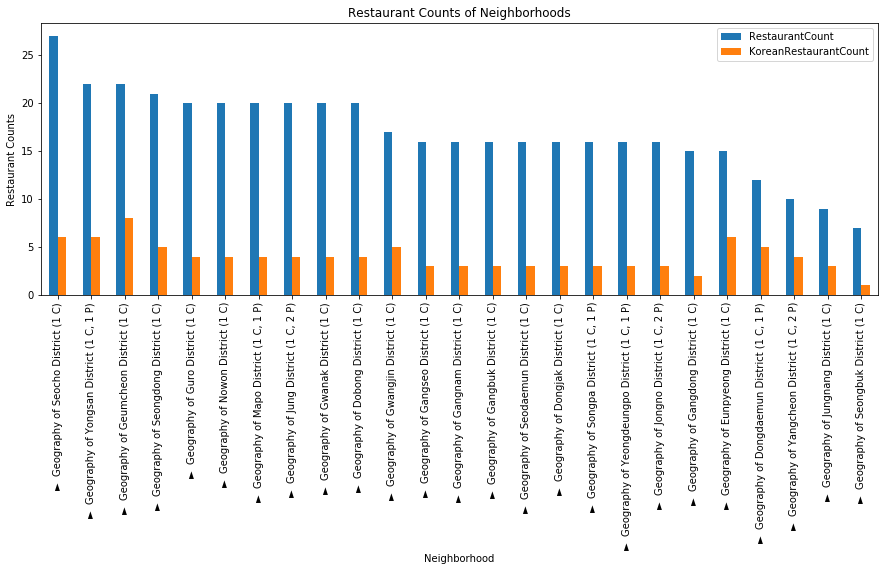

In [12]:

# get counts of restaurants in each Neighborhood
df_rest_counts =  neighborhood_restaurants.groupby(['Neighborhood']).count().rename(columns={"VenueCategory": "RestaurantCount"})[['RestaurantCount']]

#find neighborhoods that does not have any restaurant 
noRestList = list(set(neighborhood_venues['Neighborhood']) - set(neighborhood_restaurants['Neighborhood']))

#if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_rest_counts = df_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'RestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))

df_rest_counts.reset_index(inplace=True)


# get counts of Seoul restaurants in each Neighborhood
df_Seoul_rest_counts =  Korean_restaurants.groupby(['Neighborhood']).count().rename(columns={"VenueCategory": "KoreanRestaurantCount"})[['KoreanRestaurantCount']]

#find neighborhoods that does not have any restaurant 
noRestList = list(set(neighborhood_venues['Neighborhood']) - set(Korean_restaurants['Neighborhood']))

#if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_Seoul_rest_counts = df_Seoul_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'KoreanRestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))

df_Seoul_rest_counts.reset_index(inplace=True)
df_rest_counts= df_rest_counts.merge(df_Seoul_rest_counts).set_index('Neighborhood')
df_rest_counts= df_rest_counts.sort_values(by=['RestaurantCount'],ascending =False)

print('The number of neighborhoods that do not have Korean restaurant: {}'.format(len(noRestList)))

#Draw graph
df_rest_counts[['RestaurantCount','KoreanRestaurantCount']].plot(kind='bar',figsize=(15,5))
plt.title('Restaurant Counts of Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Restaurant Counts')
plt.show()

In [13]:
def getVenueRaitings(venues):
    raitings = []
    likes =[]
    for venueId in venues:   
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venueId, CLIENT_ID, CLIENT_SECRET, VERSION)
        result = requests.get(url).json()
        try:
            rating = result['response']['venue']['rating']
            likes = result['response']['venue']['likes']['count']
        except:
            rating = None
            likes = None
        
        raitings.append((venueId, rating,likes))
 
    # convert the venues list into a DataFrame
    rating = pd.DataFrame(raitings)
    # define the column names
    rating.columns = ['VenueId', 'VenueRating','VenueLikes']
    return rating    

restaurants_raitings = getVenueRaitings(neighborhood_restaurants['VenueId'].drop_duplicates())
restaurants_raitings.head()

,VenueId,VenueRating,VenueLikes
0,4e182a22183880768f3de3df,None,None
1,50716169e4b015d05031afaf,None,None
2,55362424498ec18ccb5b4ce1,None,None
3,565acfcf498e3d9d3bf32b1c,None,None
4,4ebe29f029c25ce5a139de47,None,None


Unfortunately, ratings and likes information of Korean venues from foursquare were lacking. 

In [14]:
#merge raitings to restaurants 
neighborhood_restaurants = neighborhood_restaurants.merge(restaurants_raitings)
neighborhood_restaurants.head()

,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,Name,Population,VenueRating,VenueLikes
0,► Geography of Dobong District‎ (1 C),37.509094,127.012269,비너스본사 건너편갈비살,4e182a22183880768f3de3df,37.509647,127.018343,539,BBQ Joint,Eunpyeong-gu (은평구; 恩平區),"503,243",None,None
1,► Geography of Guro District‎ (1 C),37.509094,127.012269,비너스본사 건너편갈비살,4e182a22183880768f3de3df,37.509647,127.018343,539,BBQ Joint,NaN,NaN,None,None
2,► Geography of Gwanak District‎ (1 C),37.509094,127.012269,비너스본사 건너편갈비살,4e182a22183880768f3de3df,37.509647,127.018343,539,BBQ Joint,NaN,NaN,None,None
3,"► Geography of Jung District‎ (1 C, 2 P)",37.509094,127.012269,비너스본사 건너편갈비살,4e182a22183880768f3de3df,37.509647,127.018343,539,BBQ Joint,NaN,NaN,None,None
4,"► Geography of Mapo District‎ (1 C, 1 P)",37.509094,127.012269,비너스본사 건너편갈비살,4e182a22183880768f3de3df,37.509647,127.018343,539,BBQ Joint,NaN,NaN,None,None


In [15]:
#merge raitings to Seoul restaurants 
Korean_restaurants = Korean_restaurants.merge(restaurants_raitings)
Korean_restaurants.head(5)

,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,Name,Population,VenueRating,VenueLikes
0,► Geography of Dobong District‎ (1 C),37.509094,127.012269,거목정육식당,50716169e4b015d05031afaf,37.512219,127.010254,390,Korean Restaurant,Gangdong-gu (강동구; 江東區),"481,332",None,None
1,► Geography of Guro District‎ (1 C),37.509094,127.012269,거목정육식당,50716169e4b015d05031afaf,37.512219,127.010254,390,Korean Restaurant,NaN,NaN,None,None
2,► Geography of Gwanak District‎ (1 C),37.509094,127.012269,거목정육식당,50716169e4b015d05031afaf,37.512219,127.010254,390,Korean Restaurant,NaN,NaN,None,None
3,"► Geography of Jung District‎ (1 C, 2 P)",37.509094,127.012269,거목정육식당,50716169e4b015d05031afaf,37.512219,127.010254,390,Korean Restaurant,NaN,NaN,None,None
4,"► Geography of Mapo District‎ (1 C, 1 P)",37.509094,127.012269,거목정육식당,50716169e4b015d05031afaf,37.512219,127.010254,390,Korean Restaurant,NaN,NaN,None,None


#### 3. Cluster Neigborhoods using Agglomerative Clustering


In [16]:

# one hot encoding
onehot = pd.get_dummies(neighborhood_venues[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = neighborhood_venues['Neighborhood']

venues_grouped = onehot.groupby(["Neighborhood"]).sum().reset_index()

# move neighborhood column to the first column and filter only restaurant columns 
fixed_columns =['Neighborhood'] + list(neighborhood_venues['VenueCategory'].unique())
venues_grouped = venues_grouped[fixed_columns]

print("{}  neighborhoods' venue categories are shown in {} columns as below".format(venues_grouped.shape[0],venues_grouped.shape[1]-1))
venues_grouped.head()

25  neighborhoods' venue categories are shown in 122 columns as below


,Neighborhood,Golf Course,Auto Workshop,Outlet Store,BBQ Joint,Dive Bar,Korean Restaurant,Supermarket,Chinese Restaurant,Coffee Shop,Japanese Restaurant,Trail,Paper / Office Supplies Store,Seafood Restaurant,Flower Shop,Ice Cream Shop,Deli / Bodega,Bubble Tea Shop,Hotel,Sake Bar,Gym / Fitness Center,Department Store,Café,Hotel Bar,Gym,Italian Restaurant,Pie Shop,Brazilian Restaurant,Noodle House,Cosmetics Shop,Thai Restaurant,Japanese Curry Restaurant,Bakery,Clothing Store,Train Station,Donut Shop,Plaza,Multiplex,Fast Food Restaurant,Toy / Game Store,Bookstore,Park,Bus Stop,Gukbap Restaurant,Pub,Bistro,Chocolate Shop,Bagel Shop,Historic Site,Pedestrian Plaza,Dessert Shop,Palace,Lounge,Burger Joint,Tourist Information Center,Sushi Restaurant,Mexican Restaurant,Performing Arts Venue,Buffet,Tea Room,Indie Movie Theater,Theater,Hostel,Used Bookstore,Market,Bed & Breakfast,Steakhouse,Electronics Store,Museum,Shoe Store,Metro Station,Bunsik Restaurant,Sauna / Steam Room,Bus Station,Snack Place,Shopping Mall,Vietnamese Restaurant,Baseball Field,Sporting Goods Shop,Warehouse Store,Women's Store,Taco Place,Theme Restaurant,Food,German Restaurant,Spa,College Auditorium,Sandwich Place,Pizza Place,Asian Restaurant,Fried Chicken Joint,Campground,Theme Park,Soccer Field,Farmers Market,Udon Restaurant,Video Game Store,Soba Restaurant,Hot Spring,Wine Bar,Jazz Club,Gymnastics Gym,Ramen Restaurant,Auto Dealership,Convenience Store,Samgyetang Restaurant,Other Repair Shop,Bossam/Jokbal Restaurant,French Restaurant,Scenic Lookout,Mountain,Bridge,Grocery Store,Restaurant,Dumpling Restaurant,Canal Lock,Shop & Service,Vegetarian / Vegan Restaurant,Church,Movie Theater,Art Gallery,Korean BBQ Restaurant,Bar
0,► Geography of Dobong District‎ (1 C),1,1,1,4,2,4,1,2,8,3,1,1,2,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"► Geography of Dongdaemun District‎ (1 C, 1 P)",0,0,0,0,0,5,1,0,2,1,1,0,0,0,2,0,1,2,0,0,1,1,0,0,0,0,0,2,0,0,1,2,1,1,1,1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,► Geography of Dongjak District‎ (1 C),0,0,0,0,0,3,0,3,3,2,0,0,1,0,0,0,0,4,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,0,1,2,1,1,1,3,1,1,1,3,1,1,2,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,► Geography of Eunpyeong District‎ (1 C),0,0,0,0,0,6,1,0,6,0,1,1,1,0,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,2,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,► Geography of Gangbuk District‎ (1 C),0,0,0,0,0,3,0,3,3,2,0,0,1,0,0,0,0,4,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,0,1,2,1,1,1,3,1,1,1,3,1,1,2,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# create a new dataframe with most common venue catrgories
def return_most_common_venues(row, num_top_venues):
    row_categories = row
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

columns = ['Neighborhood','Total Number of Venues']
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
venues_most = pd.DataFrame(columns = columns)

for ind in range(venues_grouped.shape[0]):
    venues_most.loc[ind, 'Neighborhood'] = venues_grouped.iloc[ind].Neighborhood
    venues_most.loc[ind, 'Total Number of Venues'] = venues_grouped.iloc[ind,1:].sum()
    venues_most.iloc[ind, 2:] = return_most_common_venues(venues_grouped.iloc[ind, 1:], num_top_venues)

venues_most.head()
print(venues_most)

                                         Neighborhood Total Number of Venues  \
0              ►  Geography of Dobong District‎ (1 C)                     50   
1     ►  Geography of Dongdaemun District‎ (1 C, 1 P)                     33   
2             ►  Geography of Dongjak District‎ (1 C)                     50   
3           ►  Geography of Eunpyeong District‎ (1 C)                     44   
4             ►  Geography of Gangbuk District‎ (1 C)                     50   
5            ►  Geography of Gangdong District‎ (1 C)                     33   
6             ►  Geography of Gangnam District‎ (1 C)                     50   
7             ►  Geography of Gangseo District‎ (1 C)                     50   
8           ►  Geography of Geumcheon District‎ (1 C)                     50   
9                ►  Geography of Guro District‎ (1 C)                     50   
10             ►  Geography of Gwanak District‎ (1 C)                     50   
11           ►  Geography of Gwangjin Di

When adopting clustering analysis, 4 clusters were found.  

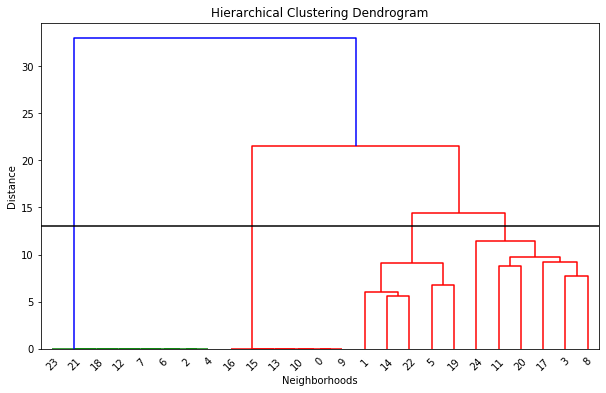

In [18]:

import scipy.cluster.hierarchy as shc

data = venues_grouped.iloc[:,4:]
plt.figure(figsize=(10, 6))   
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Neighborhoods')
plt.ylabel('Distance')
plt.axhline(y=13, c='k')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

## 4. Results

The 1st Most common restaurants for cluster 0 was coffee shop (5 counts), and Korean restaurant (1 count). For cluster 1, coffee shop (2 counts) and Korean Restaurant (3 counts) were the 1st most common restaurants. For cluster 2 and cluster 3, coffee shop (6 counts) and Hotel (8 counts) were the 1st common restaurants, respectively. 

The 2nd most common restaurants for cluster 0 was Bakery, Coffee shop, and Korean restaurant. For cluster 1, Bakery, Coffee shop, Donut shop, and Fast food restaurant were the 2nd most common restaurants. For cluster 2 and 3, BBQ Joint and Lounge were the 2nd most common restaurants, respectively.  


In [19]:

from sklearn.cluster import AgglomerativeClustering

kclusters= 4
cluster = AgglomerativeClustering(n_clusters=kclusters, affinity='euclidean', linkage='ward')  
clusterresult = cluster.fit_predict(data)

venues_grouped['NeighborhoodCluster'] = clusterresult
venues_cluster= df_neighborhood.merge(venues_grouped[['Neighborhood','NeighborhoodCluster']])
venues_cluster =venues_cluster.merge(venues_most[['Neighborhood','1st Most Common Restaurant','2nd Most Common Restaurant','3rd Most Common Restaurant']])
venues_cluster_mr = pd.concat([venues_cluster, df_sector],axis=1)
venues_cluster_mr.head()
print(venues_cluster_mr)

                                         Neighborhood   Latitude   Longitude  \
0              ►  Geography of Dobong District‎ (1 C)  37.509094  127.012269   
1     ►  Geography of Dongdaemun District‎ (1 C, 1 P)  37.581890  127.054080   
2             ►  Geography of Dongjak District‎ (1 C)  37.568260  126.977830   
3           ►  Geography of Eunpyeong District‎ (1 C)  37.618460  126.927800   
4             ►  Geography of Gangbuk District‎ (1 C)  37.568260  126.977830   
5            ►  Geography of Gangdong District‎ (1 C)  37.550390  127.145460   
6             ►  Geography of Gangnam District‎ (1 C)  37.568260  126.977830   
7             ►  Geography of Gangseo District‎ (1 C)  37.568260  126.977830   
8           ►  Geography of Geumcheon District‎ (1 C)  37.474860  126.891060   
9                ►  Geography of Guro District‎ (1 C)  37.509094  127.012269   
10             ►  Geography of Gwanak District‎ (1 C)  37.509094  127.012269   
11           ►  Geography of Gwangjin Di

In [20]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


In [21]:
# add markers to the map
for lat, lon, poi, cluster, Name, Population  in zip(venues_cluster_mr['Latitude'], venues_cluster_mr['Longitude'], venues_cluster_mr['Neighborhood'], venues_cluster_mr['NeighborhoodCluster'], venues_cluster_mr['Name'],venues_cluster_mr['Population']):
    label = folium.Popup(str(poi) + str(Name)+ ' - Cluster ' + ' ' + str(Name) + ' ' + str(Population), parse_html=True) 

folium.CircleMarker([lat, lon], radius=5, popup=label, color=rainbow[cluster-1], 
                            fill=True, 
                            fill_color=rainbow[cluster], 
                            fill_opacity=0.7).add_to(map_clusters)
folium.Circle(Seoul_center, radius=2000, fill=False, color='blue').add_to(map_clusters)
folium.Circle(Seoul_center, radius=4000, fill=False, color='blue').add_to(map_clusters)
folium.Circle(Seoul_center, radius=6000, fill=False, color='blue').add_to(map_clusters)
folium.Circle(Seoul_center, radius=10000, fill=False, color='blue').add_to(map_clusters)         
map_clusters

In [22]:

print(venues_cluster_mr.groupby(['NeighborhoodCluster','1st Most Common Restaurant' ]).count()[['Neighborhood']].rename(columns={"Neighborhood": "Neighborhood Count"}))

venues_cluster_mr.groupby(['NeighborhoodCluster','2nd Most Common Restaurant' ]).count()[['Neighborhood']].rename(columns={"Neighborhood": "Neighborhood Count"})

                                                Neighborhood Count
NeighborhoodCluster 1st Most Common Restaurant                    
0                   Coffee Shop                                  5
                    Korean Restaurant                            1
1                   Coffee Shop                                  2
                    Korean Restaurant                            3
2                   Coffee Shop                                  6
3                   Hotel                                        8


Neighborhood Count
NeighborhoodCluster 2nd Most Common Restaurant                    
0                   Bakery                                       1
                    Coffee Shop                                  1
                    Korean Restaurant                            4
1                   Bakery                                       1
                    Coffee Shop                                  1
                    Donut Shop                                   1
                    Fast Food Restaurant                         1
                    Park                                         1
2                   BBQ Joint                                    6
3                   Lounge                                       8

## 5. Discussion

Cluster 2 and 3, Korean restaurants were lacking. Korean restaurants were not common restaurants. However, this could be interpreted as the meaning there is no demand. For cluster 0, the most common restaurant was a Korean restaurant and coffee shop. Opening in cluster 0 could be very challenging since competitors were already too many. For cluster 1, the Korean restaurant was the 2nd common restaurant. This means that there may have an opportunity to open and operate the Korean restaurant well.

## 6. Conclusion

Within cluster 1, Neighborhood 1, 14, and 22 are the regions with the most Korean restaurants. So Neighborhood 5 and 19 are the most possible regions to open Korean restaurant. However, neighborhood 19 (Seongbuk district) has the least Korean restaurant as well as the Total restaurant counts. This may be interpreted as the meaning there is no demand for restaurants. Therefore, opening in Neighborhood 5 (Gangdong district) is strongly recommended. 
There was a limitation that FourSquare API was not properly used to get ranks and likes of restaurants. In a future analysis, adopting better information is also needed. 
